In [1]:
#Data Handling
import numpy as np 
import pandas as pd 

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#statistics
from scipy import stats

In [3]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data[cols] = data[cols].astype(object)

In [6]:
data.shape

(1025, 14)

In [7]:
import os
pic_path = './picture/'

In [12]:
cols.append('target')
print(cols)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [8]:
def plot_hist(name):
    sns.countplot(x = name, data = data)
    plt.ylabel('Total')
    plt.xlabel(name)
    plt.savefig(os.path.join(pic_path, name))

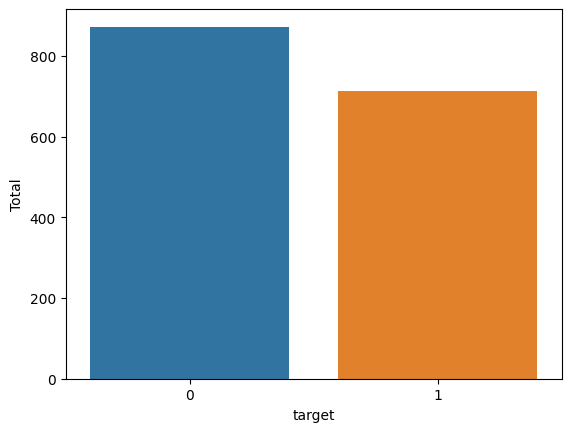

In [14]:
tmp = list(map(plot_hist, cols))

In [15]:
tmp  = list(data.dtypes == np.int64)
num_cols = data.columns[tmp].tolist()
num_cols.remove("target")
print(num_cols)

['age', 'trestbps', 'chol', 'thalach']


In [9]:
def plot_box(name):
    sns.boxplot(data = data, x = name)
    plt.xlabel(name)
    plt.savefig(os.path.join(pic_path, name))
    plt.figure().clear()

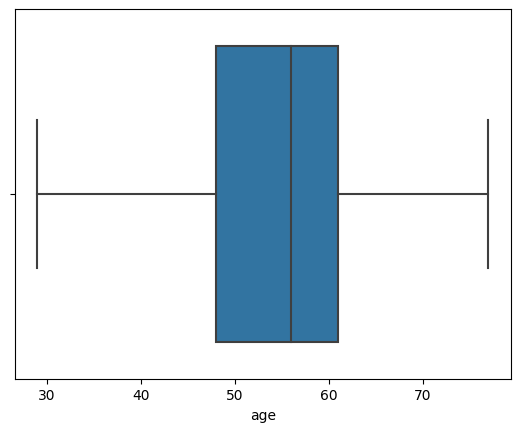

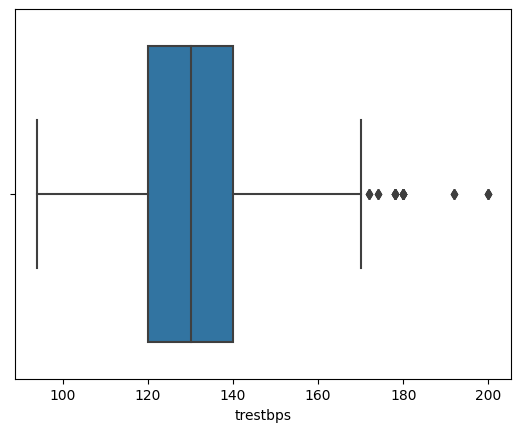

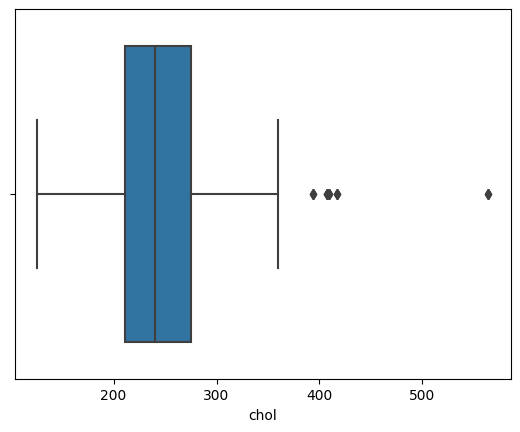

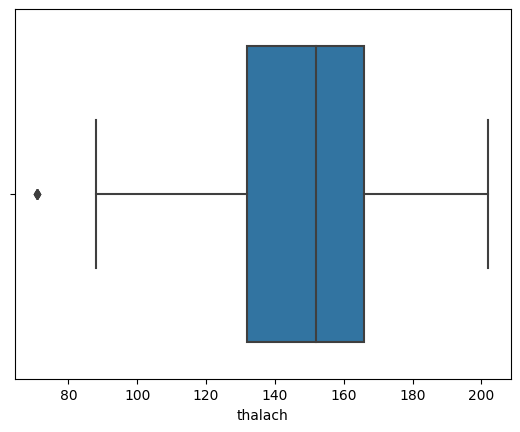

<Figure size 640x480 with 0 Axes>

In [17]:
tmp = list(map(plot_box, num_cols))

In [10]:
def stats_test(col):
  if data[col].dtype == np.int64 or data[col].dtype == np.float64:
    tmp0 = data.loc[data['target'] == 0, col].values
    tmp1 = data.loc[data['target'] == 1, col].values

    result = stats.ttest_ind(tmp0, tmp1)[0:2]

  else:
    contingency_table = data.pivot_table(index = [col], columns = 'target', values = 'age', aggfunc = 'count')
    contingency_table = contingency_table.fillna(0)
    contingency_table = contingency_table.values

    result = stats.chi2_contingency(contingency_table, correction = False)[0:2]

  return result

In [11]:
all_cols = data.columns[:-1].tolist()
results = {c: stats_test(c) for c in all_cols}
print(results)

{'age': (7.535591207962243, 1.0677220241596988e-13), 'sex': (80.073690160122, 3.607034554789316e-19), 'cp': (280.98224857035257, 1.2980664694820452e-60), 'trestbps': (4.481891658165884, 8.233014978865772e-06), 'chol': (3.213433097179175, 0.0013525712504626978), 'fbs': (1.7367985808714619, 0.18754497946454646), 'restecg': (35.784315178352564, 1.6964251003877617e-08), 'thalach': (-14.926471051150799, 9.96297084035381e-46), 'exang': (196.66573593062776, 1.1155084593065394e-44), 'oldpeak': (15.602909340340647, 2.141338038132592e-49), 'slope': (155.87294465816163, 1.421085239254566e-34), 'ca': (257.2929975952664, 1.747013451046176e-54), 'thal': (280.33068874382866, 1.795894354453151e-60)}


fbs不顯著

In [12]:
def plot_bi_hist(name):
    sns.countplot(x = name, data = data, hue = 'target')
    plt.ylabel('Total')
    plt.xlabel(name)
    name = "bivariate_" + name
    plt.savefig(os.path.join(pic_path, name))
    plt.figure().clear()

In [13]:
def plot_bi_box(name):
    sns.boxplot(data = data, x = 'target', y = name)
    name = "bivariate_" + name
    plt.savefig(os.path.join(pic_path, name))
    plt.figure().clear()

In [26]:
cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
cols

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

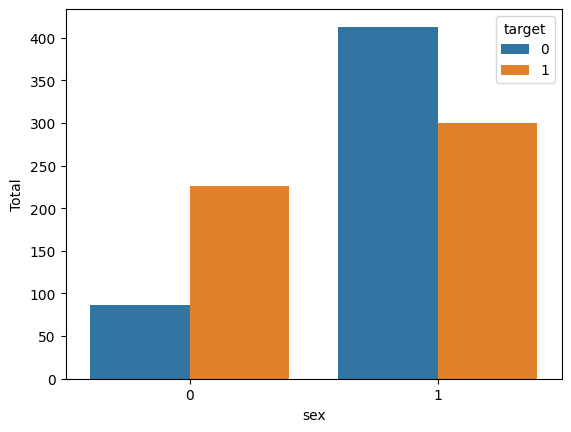

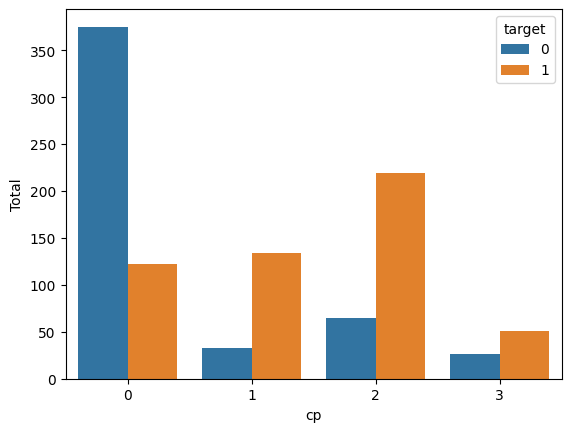

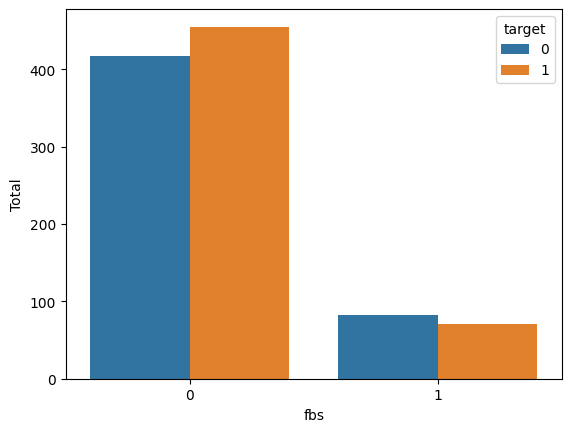

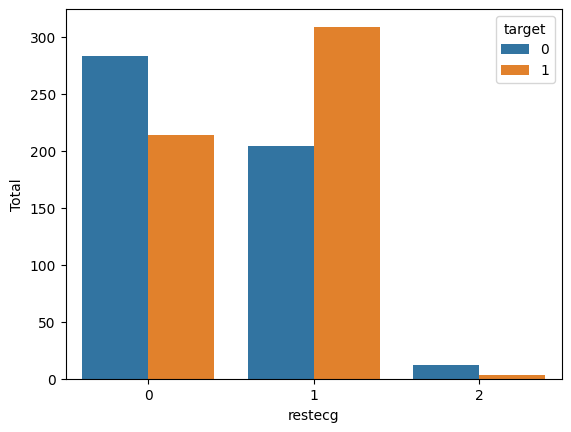

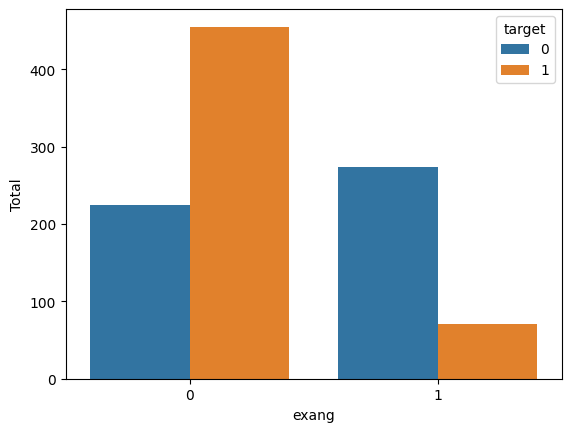

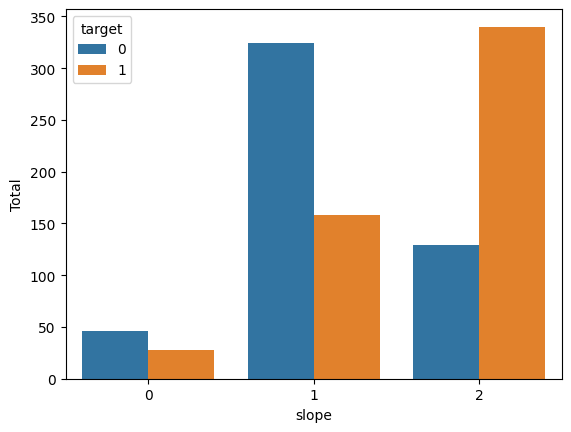

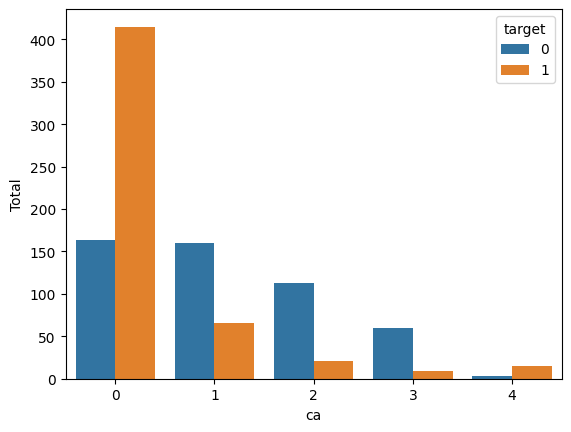

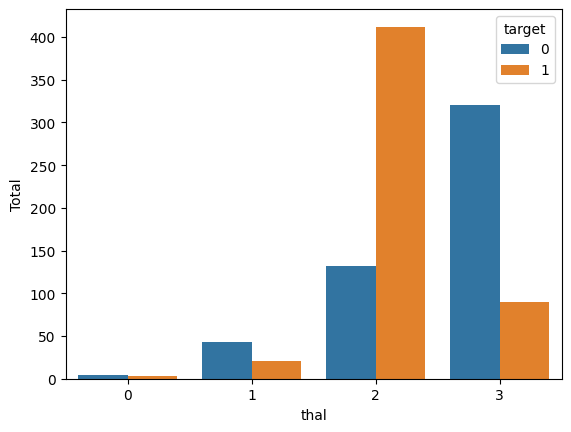

<Figure size 640x480 with 0 Axes>

In [32]:
tmp = list(map(plot_bi_hist, cols))

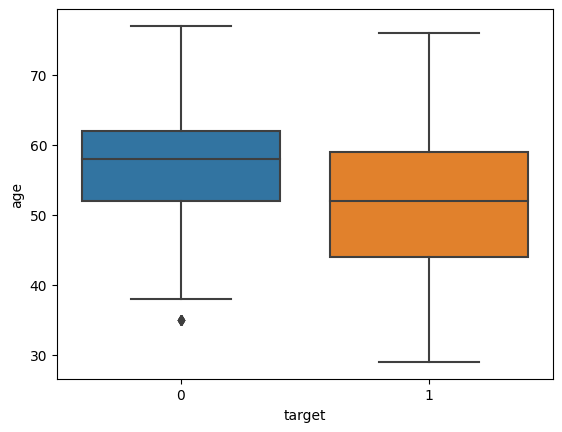

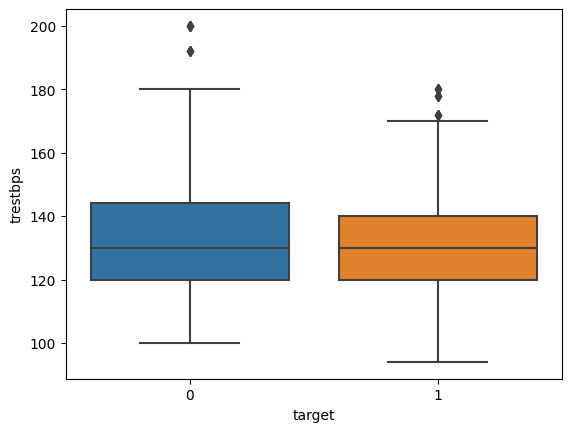

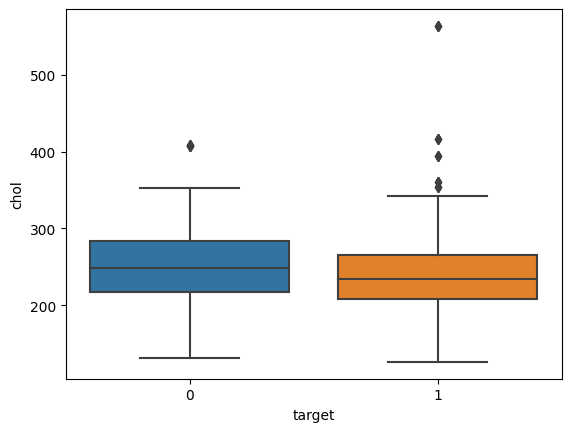

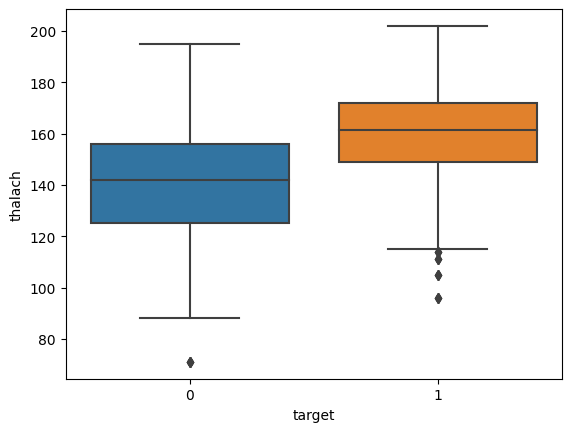

<Figure size 640x480 with 0 Axes>

In [33]:
tmp = list(map(plot_bi_box, num_cols))

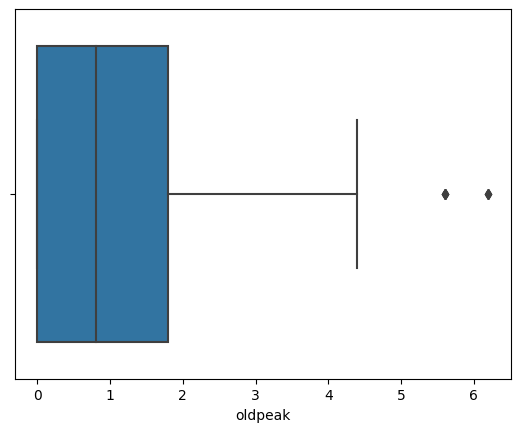

<Figure size 640x480 with 0 Axes>

In [15]:
plot_box('oldpeak')

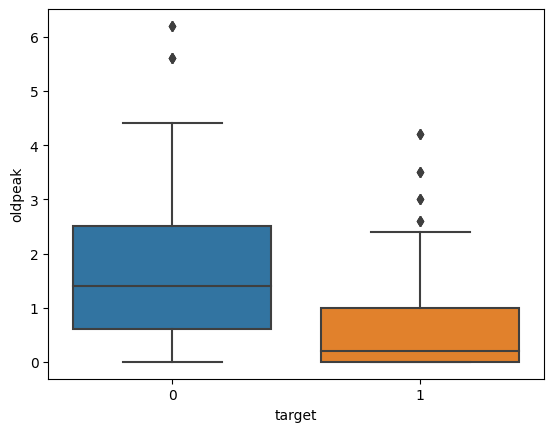

<Figure size 640x480 with 0 Axes>

In [16]:
plot_bi_box('oldpeak')